In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = pd.read_csv('lianjia1.csv', encoding='gbk')
data2 = pd.read_csv('lianjia2.csv', encoding='gbk')
data3 = pd.read_csv('lianjia3.csv', encoding='utf-8')
data4 = pd.read_csv('lianjia4.csv', encoding='utf-8')
data5 = pd.read_csv('lianjia5.csv', encoding='utf-8')
data6 = pd.read_csv('lianjia6.csv', encoding='utf-8')
data7 = pd.read_csv('lianjia7.csv', encoding='utf-8')

In [3]:
data = pd.concat([data1, data2, data3, data4, data5,data6,data7])

In [4]:
data.dropna(inplace= True)

In [5]:
data['cjdanjia'] = data.cjdanjia.str.replace('元/平','').astype(np.float32).map(lambda x : round(x/10000, 2))

In [6]:
data1 = data[data.cjxiaoqu.str.contains('龙锦苑东一区 3室2厅 124平')]

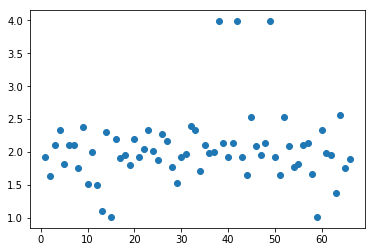

In [7]:
plt.scatter(range(1, len(data1) + 1), data1.cjdanjia)

In [8]:
from sklearn.cluster import KMeans

In [9]:
y_pred = KMeans(n_clusters=2).fit_predict(data1[['cjdanjia']])

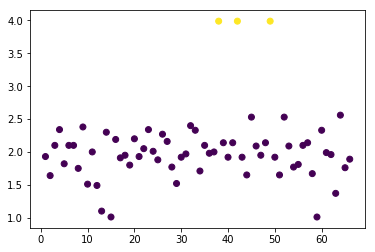

In [10]:
plt.scatter(range(1, len(data1) + 1), data1.cjdanjia, c = y_pred)

In [11]:
data2 = data[data.cjxiaoqu.str.contains('龙锦苑东五区 3室2厅 124平')]

In [12]:
y_pred2 = KMeans(n_clusters=2).fit_predict(data2[['cjdanjia']])

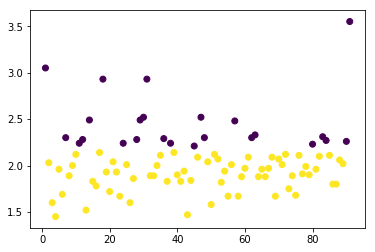

In [13]:
plt.scatter(range(1, len(data2) + 1), data2.cjdanjia, c = y_pred2)

In [14]:
from sklearn.cluster import DBSCAN

/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


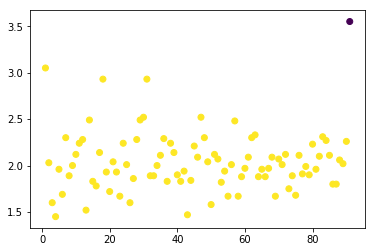

In [15]:
y_pred = DBSCAN().fit_predict(data2.cjdanjia.reshape(-1, 1))

plt.scatter(range(1, len(data2) + 1), data2.cjdanjia, c = y_pred)